In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from functools import wraps
import time

2024-02-18 11:06:05.847338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-18 11:06:06.705663: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64
2024-02-18 11:06:06.705782: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64
2024-02-18 11:06:06.705791: W tensorflow/compiler/tf2tensorrt/utils/py_utils

In [2]:
with open('mnist-1d.npy', 'rb') as f:
    x = np.load(f)
    y = np.load(f)

In [3]:
def create_y(i):
    a = np.zeros(10)
    a[i] = 1.0
    return a

def create_datasets(x, y, split):
    assert len(x) == len(y)
    p = np.random.permutation(len(x))
    x = x[p]
    y = y[p]

    split = int(len(x) * split)
    x_train = x[:split]
    y_train = y[:split]
    x_test = x[split:]
    y_test = y[split:]
    
    return x_train, y_train, x_test, y_test

In [4]:
x = x.astype(np.float64) / 255.0
y = np.array([create_y(_y) for _y in y])

In [5]:
x_train, y_train, x_test, y_test = create_datasets(x, y, 0.7)

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(40, 1)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 40)                0         
                                                                 
 dense (Dense)               (None, 100)               4100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 25,310
Trainable params: 25,310
Non-trainable params: 0
_________________________________________________________________


2024-02-18 11:06:34.238714: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-18 11:06:34.254513: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-18 11:06:34.254572: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-18 11:06:34.255612: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
h = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2024-02-18 11:06:37.237124: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1aed6130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-18 11:06:37.237171: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1060, Compute Capability 6.1
2024-02-18 11:06:37.249396: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-18 11:06:37.441790: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


110/110 [==============================] - 3s 8ms/step - loss: 2.2836 - accuracy: 0.1306 - val_loss: 2.2400 - val_accuracy: 0.1510
Epoch 2/10
110/110 [==============================] - 1s 6ms/step - loss: 2.1850 - accuracy: 0.1824 - val_loss: 2.1692 - val_accuracy: 0.1723
Epoch 3/10
110/110 [==============================] - 1s 6ms/step - loss: 2.1247 - accuracy: 0.2093 - val_loss: 2.1616 - val_accuracy: 0.2017
Epoch 4/10
110/110 [==============================] - 1s 7ms/step - loss: 2.1035 - accuracy: 0.2217 - val_loss: 2.0778 - val_accuracy: 0.2377
Epoch 5/10
110/110 [==============================] - 1s 6ms/step - loss: 2.0672 - accuracy: 0.2443 - val_loss: 2.0528 - val_accuracy: 0.2507
Epoch 6/10
110/110 [==============================] - 1s 6ms/step - loss: 2.0215 - accuracy: 0.2686 - val_loss: 2.0021 - val_accuracy: 0.2723
Epoch 7/10
110/110 [==============================] - 1s 6ms/step - loss: 1.9528 - accuracy: 0.2963 - val_loss: 1.9718 - val_accuracy: 0.2920
Epoch 8/10
110/11

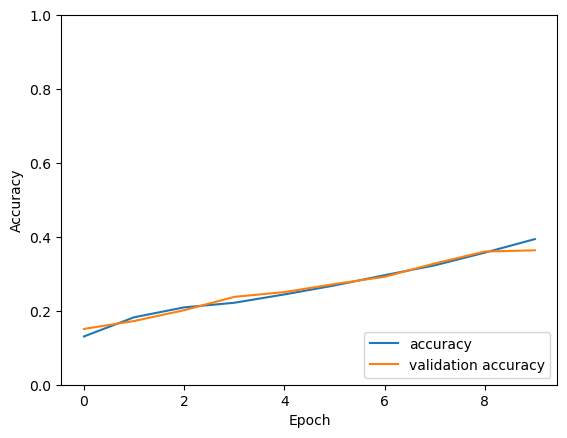

In [9]:
plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [10]:
# genes -> random string
# max len 32
# first layer is 40 dim vector
# each letter signify random generator seed
# vector of equal size is generated with gaussian distribution and summed to active layer
# if char is 'l' then new active layer with dim of next char is created
# last layer is 10 dim vector
# between last and second to last layers W matrix with only ones is generated
# last layer gets softmax treatment

In [11]:
# https://dev.to/kcdchennai/python-decorator-to-measure-execution-time-54hk
def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'Function {func.__name__}(...) Took {total_time:.4f} seconds')
        return result
    return timeit_wrapper

In [12]:
def create_model(g, in_shape=40, out_shape=10):
    model = []
    
    model.append(np.zeros((ord(g[0]), in_shape)))
    
    b_new_layer = False
    for c in g[1:]:
        if (c == 'l'):
            b_new_layer = True
        elif b_new_layer:
            b_new_layer = False
            model.append(np.zeros((ord(c), model[-1].shape[0])))
        else:
            rng = np.random.default_rng(ord(c))
            model[-1] += rng.normal(size=np.shape(model[-1]))

    model.append(np.zeros((out_shape, model[-1].shape[0])))
    rng = np.random.default_rng(ord(g[-1]))
    model[-1] += rng.normal(size=np.shape(model[-1]))
    return model

MUTATE = np.random.default_rng(42)
def mutate(g, max):
    if (MUTATE.random() < 0.5):
        i = MUTATE.integers(len(g))
        c = chr(MUTATE.integers(32, 127))
        g = g[:i] + c + g[i + 1:]
    else:
        n = MUTATE.integers(len(g))
        g = g[:n] + chr(MUTATE.integers(32, 127)) + g[n:]
    
    if len(g) > max:
        return g[:max]
    return g

def cross(p0, p1):
    half0 = int(len(p0) / 2)
    half1 = int(len(p1) / 2)
    c0 = p0[:half0] + p1[half1:]
    c1 = p1[:half1] + p0[half0:]
    return c0, c1

def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce

def relu(x):
    return x * (x > 0)

def softmax(x):
    return np.exp(x)/sum(np.exp(x))

In [13]:
@timeit
def evolve(x, y, epochs, population_size=100, fit=0.1, mutations=0.05, min_genes=8, max_genes=64, debug_print=10, seed=42):
    assert len(x) == len(y)

    fit_size = int(population_size * fit)
    
    avg_loss = np.zeros(epochs)
    max_loss = np.zeros(epochs)
    min_loss = np.zeros(epochs)
    
    rng = np.random.default_rng(seed)
    pop = np.array([''.join([chr(rng.integers(32, 127)) for _ in range(min_genes)]) for __ in range(population_size)])

    debug_counter = 0
    
    for e in range(epochs):
        losses = np.zeros(len(pop))
        for i in range(len(pop)):
            p = pop[i]
            m = create_model(p)

            loss = 0
            for j in range(len(x)):
                v = x[j]
                for _m in m:
                    v = softmax(np.matmul(_m, v))
                loss += cross_entropy(v, y[j])
            losses[i] = loss / len(x)

        # sort by loss
        tmp = np.argsort(losses)
        pop[np.flip(tmp)]
        
        # clear below fit
        pop0 = pop[:fit_size]
        
        # repopulate with cross
        pairs = [rng.integers(0, high=fit_size, size=2) for _ in range(population_size - fit_size)]
        pop1 = []
        for p in pairs:
            c0, c1 = cross(pop0[p[0]], pop0[p[1]])
            pop1.append(c0)
            pop1.append(c1)

        pop1 = np.array(pop1)
        rng.permuted(pop1, out=pop1)
        pop[:fit_size] = pop0
        pop[fit_size:] = pop1[population_size - fit_size]
        
        # mutate with rate
        for _ in range(int(population_size * mutations)):
            i = rng.integers(0, high=population_size)
            pop[i] = mutate(pop[i], max_genes)

        # update stats
        avg_loss[e] = losses.mean()
        max_loss[e] = losses.max()
        min_loss[e] = losses.min()

        if (debug_print < 0):
            continue

        if (debug_counter == debug_print):
            debug_counter = 0
            print('epoch ' + str(e) + ', avg loss: ' + str(losses.mean()) + ', max loss: ' + str(losses.max()) + ', min loss:' + str(losses.min()))
        debug_counter += 1
    
    return avg_loss, max_loss, min_loss

In [14]:
# avg, max, min = evolve(x[:20], y[:20], 100, population_size=100)

In [15]:
def cross_entropy1(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    n = predictions.shape[1]
    N = np.full((predictions.shape[0]), n)
    ce = -np.sum(targets*np.log(predictions+1e-9), axis=1)/N
    return ce

@timeit
def evolve1(x, y, epochs, population_size=100, fit=0.1, mutations=0.05, min_genes=8, max_genes=64, debug_print=10, seed=42):
    assert len(x) == len(y)

    fit_size = int(population_size * fit)
    
    avg_loss = np.zeros(epochs)
    max_loss = np.zeros(epochs)
    min_loss = np.zeros(epochs)
    
    rng = np.random.default_rng(seed)
    pop = np.array([''.join([chr(rng.integers(32, 127)) for _ in range(min_genes)]) for __ in range(population_size)])

    debug_counter = 0

    __x = x.transpose().copy()
    
    for e in range(epochs):
        losses = np.zeros(len(pop))
        for i in range(len(pop)):
            p = pop[i]
            m = create_model(p)

            v = __x.copy()
            for _m in m:
                v = softmax(np.matmul(_m, v))
            v = v.transpose()
            losses[i] = cross_entropy1(v, y).mean()

        # sort by loss
        tmp = np.argsort(losses)
        pop[np.flip(tmp)]
        
        # clear below fit
        pop0 = pop[:fit_size]
        
        # repopulate with cross
        pairs = [rng.integers(0, high=fit_size, size=2) for _ in range(population_size - fit_size)]
        pop1 = []
        for p in pairs:
            c0, c1 = cross(pop0[p[0]], pop0[p[1]])
            pop1.append(c0)
            pop1.append(c1)

        pop1 = np.array(pop1)
        rng.permuted(pop1, out=pop1)
        pop[:fit_size] = pop0
        pop[fit_size:] = pop1[population_size - fit_size]
        
        # mutate with rate
        for _ in range(int(population_size * mutations)):
            i = rng.integers(0, high=population_size)
            pop[i] = mutate(pop[i], max_genes)

        # update stats
        avg_loss[e] = losses.mean()
        max_loss[e] = losses.max()
        min_loss[e] = losses.min()

        if (debug_print < 0):
            continue

        if (debug_counter == debug_print):
            debug_counter = 0
            print('epoch ' + str(e) + ', avg loss: ' + str(losses.mean()) + ', max loss: ' + str(losses.max()) + ', min loss:' + str(losses.min()))
        debug_counter += 1
    
    return avg_loss, max_loss, min_loss

In [16]:
# avg, max, min = evolve1(x[:40], y[:40], 100, population_size=100)

In [17]:
def cross_entropy2(predictions, targets, N, epsilon=1e-12):
    predictions = tf.clip_by_value(predictions, epsilon, 1. - epsilon)
    # n = predictions.shape[1]
    # N = np.full((predictions.shape[0]), n)
    ce = -tf.experimental.numpy.sum(targets*tf.math.log(predictions+1e-9), axis=1)/N
    return ce.numpy()

@timeit
def evolve2(x, y, epochs, population_size=100, fit=0.1, mutations=0.05, min_genes=8, max_genes=64, debug_print=10, seed=42):
    assert len(x) == len(y)

    fit_size = int(population_size * fit)
    
    avg_loss = np.zeros(epochs)
    max_loss = np.zeros(epochs)
    min_loss = np.zeros(epochs)
    
    rng = np.random.default_rng(seed)
    pop = np.array([''.join([chr(rng.integers(32, 127)) for _ in range(min_genes)]) for __ in range(population_size)])

    debug_counter = 0

    __x = tf.constant(x.transpose().copy())
    __y = tf.constant(y)
    
    n = y.shape[1]
    __N = tf.constant(np.full((y.shape[0]), n, dtype=np.float64))
    
    for e in range(epochs):
        losses = np.zeros(len(pop))
        for i in range(len(pop)):
            p = pop[i]
            m = create_model(p)
            tf_m = [tf.constant(_m) for _m in m]
            
            v = __x
            for _m in m:
                v = tf.nn.softmax(tf.linalg.matmul(_m, v))
            v = tf.transpose(v)
            losses[i] = cross_entropy2(v, y, __N).mean()

        # sort by loss
        tmp = np.argsort(losses)
        # pop[np.flip(tmp)]
        pop[tmp]
        
        # clear below fit
        pop0 = pop[:fit_size]
        
        # repopulate with cross
        pairs = [rng.integers(0, high=fit_size, size=2) for _ in range(population_size - fit_size)]
        pop1 = []
        for p in pairs:
            c0, c1 = cross(pop0[p[0]], pop0[p[1]])
            pop1.append(c0)
            pop1.append(c1)

        pop1 = np.array(pop1)
        rng.permuted(pop1, out=pop1)
        pop[:fit_size] = pop0
        pop[fit_size:] = pop1[population_size - fit_size]
        
        # mutate with rate
        for _ in range(int(population_size * mutations)):
            i = rng.integers(0, high=population_size)
            pop[i] = mutate(pop[i], max_genes)

        # update stats
        avg_loss[e] = losses.mean()
        max_loss[e] = losses.max()
        min_loss[e] = losses.min()

        if (debug_print < 0):
            continue

        if (debug_counter == debug_print):
            debug_counter = 0
            print('epoch ' + str(e) + ', avg loss: ' + str(losses.mean()) + ', max loss: ' + str(losses.max()) + ', min loss:' + str(losses.min()))
        debug_counter += 1
    
    return avg_loss, max_loss, min_loss

In [18]:
# lavg, lmax, lmin = evolve2(x, y, 100, population_size=200)

In [19]:
"""
fig, ax = plt.subplots()
fig.suptitle('Evolution loss')
ax.plot(lavg, label='avg loss')
ax.plot(lmax, label = 'max loss')
ax.plot(lmin, label = 'min loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_ylim([0.0, 1])
ax.legend(loc='lower right')
plt.show()
"""

"\nfig, ax = plt.subplots()\nfig.suptitle('Evolution loss')\nax.plot(lavg, label='avg loss')\nax.plot(lmax, label = 'max loss')\nax.plot(lmin, label = 'min loss')\nax.set_xlabel('Epoch')\nax.set_ylabel('Loss')\nax.set_ylim([0.0, 1])\nax.legend(loc='lower right')\nplt.show()\n"

In [20]:
# todo: tensorflow profiler
# todo: evolve2 profiling
# todo: tensorflow threading/pooling

In [21]:
# https://chromium.googlesource.com/external/github.com/tensorflow/tensorflow/+/r0.10/tensorflow/g3doc/get_started/index.md

In [22]:
a = np.array([[1, 2, 0], [3, 4, 0], [0, 0, 0]])
b = np.array([[1, 2, 3], [4, 5, 6], [0, 0, 0]])
c = np.array([a, b])
d = np.array([[1, 2, 0], [1, 2, 3]])
# [[5, 11, 0], [14, 32, 0]]
# (2, 3, 3) * (2, 3) = (2, 3)
print(np.shape(c))
print(np.shape(d))

(2, 3, 3)
(2, 3)


In [23]:
np.einsum('...kj,...j', c, d)

array([[ 5, 11,  0],
       [14, 32,  0]])

In [72]:
x_tmp = x[:10]

In [73]:
m0, m1 = create_model('omena'), create_model('appelsiini')

In [104]:
rows1 = max(m0[0].shape[0], m1[0].shape[0])
cols1 = max(m0[0].shape[1], m1[0].shape[1])
rows2 = max(m0[1].shape[0], m1[1].shape[0])
cols2 = max(m0[1].shape[1], m1[1].shape[1])

In [105]:
print(m0[0].shape)
print(m1[0].shape)

(111, 40)
(97, 40)


In [106]:
layer1 = np.array([
    np.pad(m0[0], ((0, rows1-m0[0].shape[0]), (0, cols1-m0[0].shape[1])), constant_values=0),
    np.pad(m1[0], ((0, rows1-m1[0].shape[0]), (0, cols1-m1[0].shape[1])), constant_values=0)])
layer2 = np.array([
    np.pad(m0[1], ((0, rows2-m0[1].shape[0]), (0, cols2-m0[1].shape[1])), constant_values=0),
    np.pad(m1[1], ((0, rows2-m1[1].shape[0]), (0, cols2-m1[1].shape[1])), constant_values=0)])
print(layer1.shape)
print(layer2.shape)

(2, 111, 40)
(2, 115, 111)


In [264]:
v_tmp = x[:10].T
v_tmp = np.array([v_tmp, v_tmp])
print(v_tmp.shape)
### v_tmp = np.einsum('...kj,...ji', layer1, v_tmp) # (2, 10, 111)
### v_tmp = np.einsum('...ki,...ij', layer1, v_tmp) # (2, 10, 111)
v_tmp = np.einsum('kj...,...ik->...jk', layer1, v_tmp)
print(v_tmp.shape) # (2, 111, 10)

(2, 40, 10)


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,111,40)->(40,111,2,newaxis) (2,40,10)->(2,newaxis,10,40) 

In [86]:
np.matmul(m0[0], x[:10].T).shape

(111, 10)